In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\happiness_score_dataset.csv")

## EDA

In [3]:
#checking the data
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df.shape

(158, 12)

## The dataset has 158 Rows and 12 columns

In [5]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### There is no missing values in this dataset. Country and Region has object datatype and remaining has numerical datatype

In [6]:
# Just confirming for Nan values
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Checking general statistics of the dataset

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## There is some kind of skewness in the datsets.

## Univariate Analysis

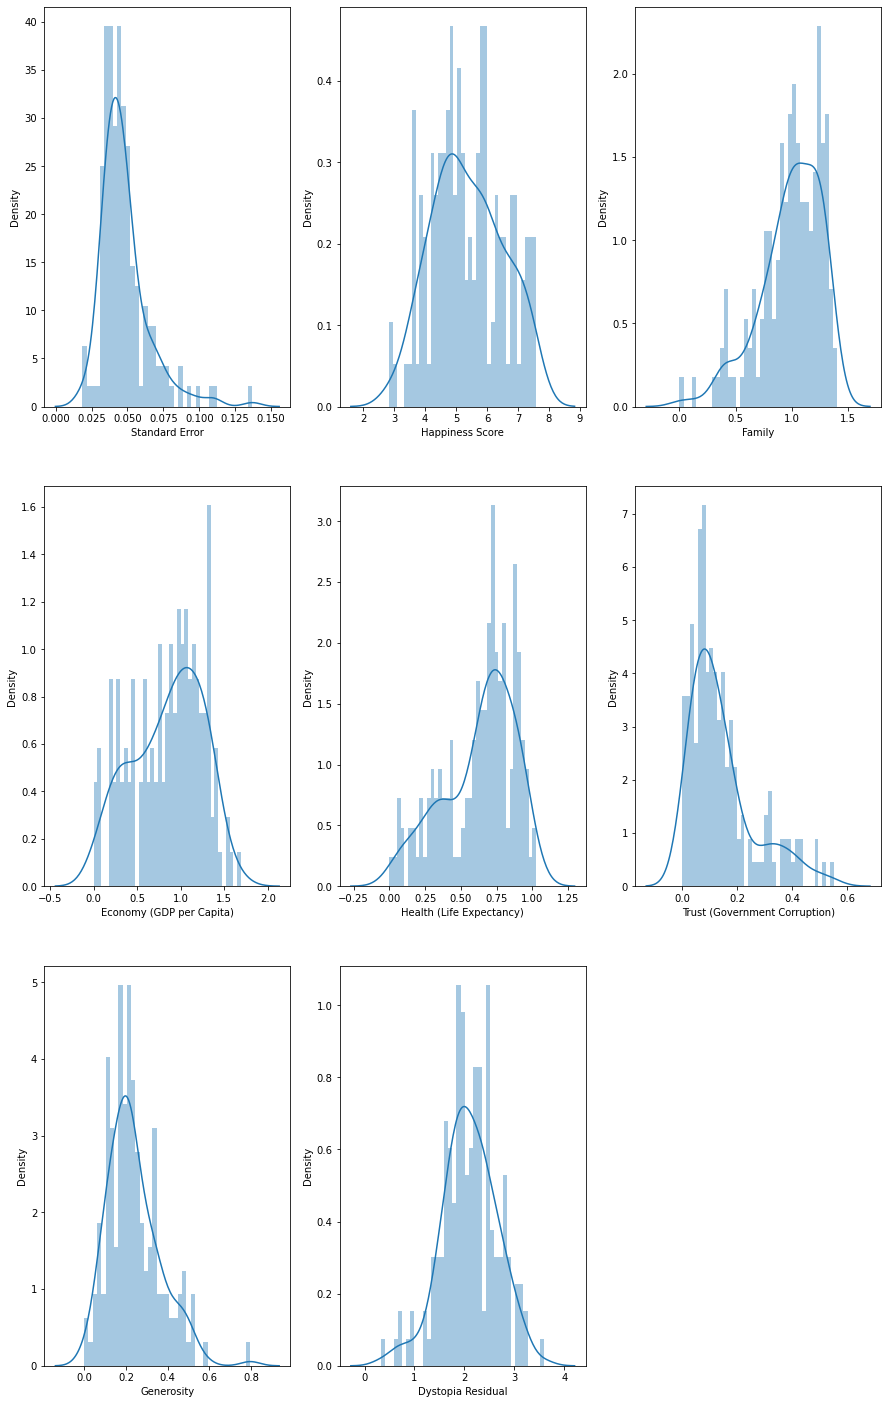

In [8]:
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df[['Standard Error','Happiness Score','Family','Economy (GDP per Capita)','Health (Life Expectancy)','Trust (Government Corruption)','Generosity','Dystopia Residual']]:
    if plotnumber < 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i], kde=True, bins = 39)
        plotnumber+=1

From above analysis we can say that there is some kind of skewness in **Generosity, Dystopia Residual, Standard Error and Family**

## Bivariate Analysis

#### Checking relation between Happiness Score and Remaining Features

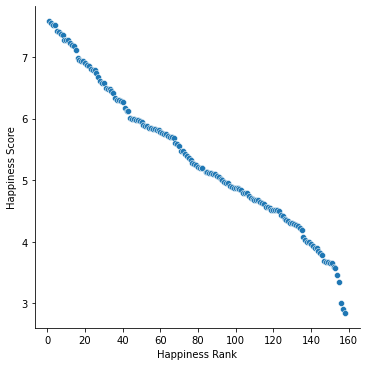

In [9]:
sns.relplot(x = 'Happiness Rank', y = 'Happiness Score', data=df)

## From Above graph we can say that Happiness score and Happiness Rank is negatively related or we can say that Ranking is Done on the Basis of Happiness score.

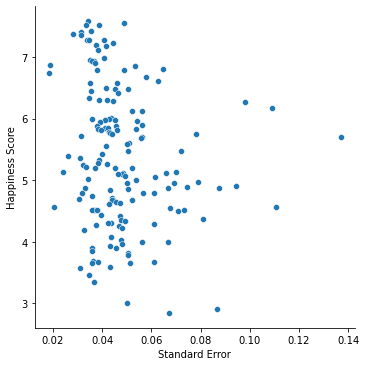

In [10]:
sns.relplot(x = 'Standard Error', y = 'Happiness Score', data=df)

### From above graph we can say that it's not directly related to the Label

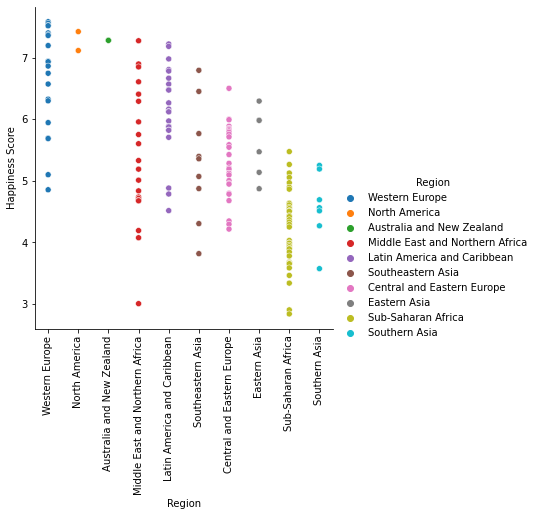

In [11]:
sns.relplot(x = 'Region', y = 'Happiness Score',hue='Region' ,data=df)
ax=plt.xticks(rotation=90)

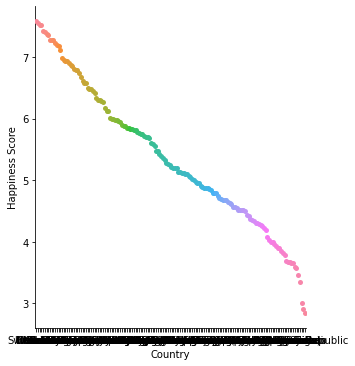

In [12]:
sns.catplot(x = 'Country', y = 'Happiness Score',data=df)

### It's some kind of negatively correlated to the Happiness Score Same as Happiness Rank

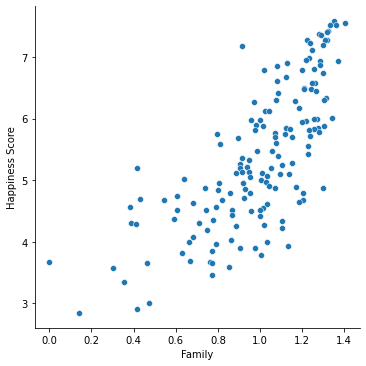

In [13]:
sns.relplot(x = 'Family', y = 'Happiness Score',data=df)

## There is some kind of Linear relationship between Happiness score and Family

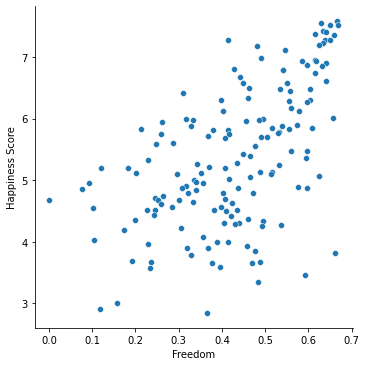

In [14]:
sns.relplot(x = 'Freedom', y = 'Happiness Score',data=df)

### There is some kind of Linear relationship between Happiness score and Freedom

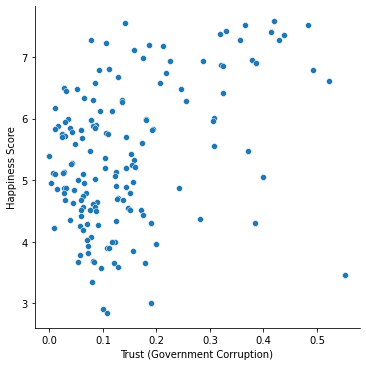

In [15]:
sns.relplot(x = 'Trust (Government Corruption)', y = 'Happiness Score',data=df)

### There is some kind of relationship between Happiness score and Trust (Government Corruption) but we need to confirm it using Multivariant analysis

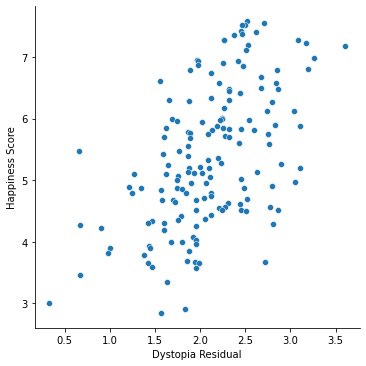

In [16]:
sns.relplot(x = 'Dystopia Residual', y = 'Happiness Score',data=df)

### There is some kind of relationship between Happiness score and Dystopia Residual.

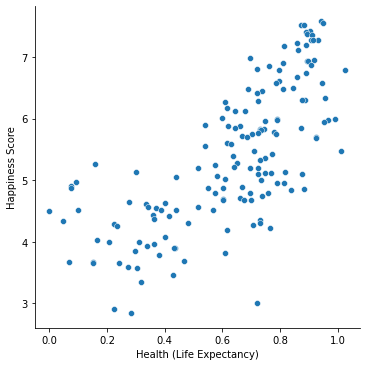

In [17]:
sns.relplot(x = 'Health (Life Expectancy)', y = 'Happiness Score',data=df)

### There is some kind of Linear relationship between Happiness score and Health (Life Expectancy)

## Before proceeding for Multivariant analysis It's important to Encode the Object data type column

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lab_enc = LabelEncoder()
df.Country = lab_enc.fit_transform(df['Country'])
df.Region = lab_enc.fit_transform(df['Region'])

In [20]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45,9,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134,9,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100,0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


## Multivariant Analysis

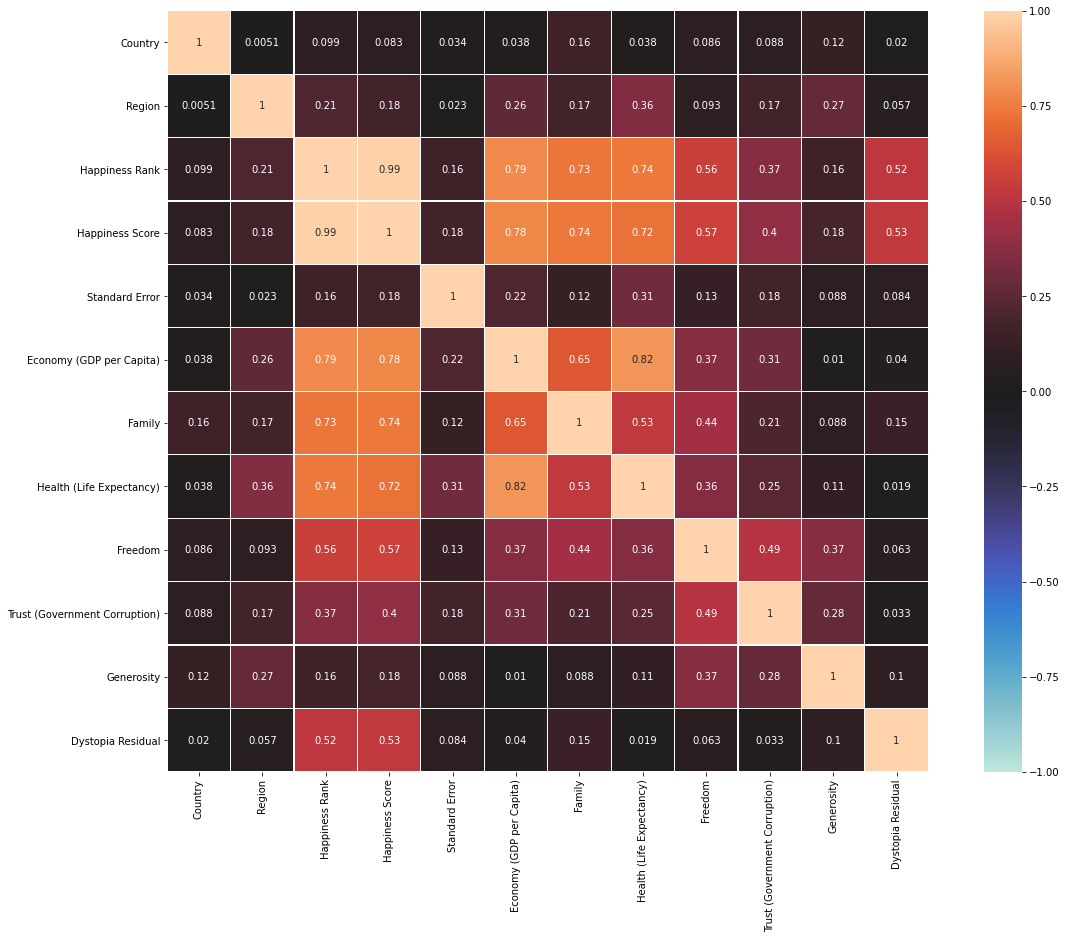

In [21]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,14))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)
plt.show()

From above graph:
1. Country has around 8 percent of relation with Label
2. Family,Health and Economy is strongly correlated with Label
3. Health and Economy is also correlated to each other

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

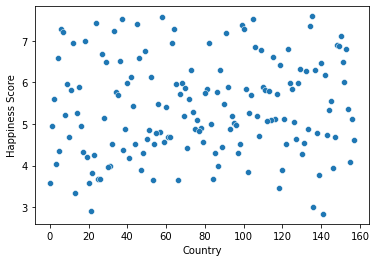

In [22]:
# Again checking Whether Country has any kind of relation with Label or not
sns.scatterplot("Country","Happiness Score",data=df)

From above graph we can say that it's just an index not having anything to do in predicting a **Happiness Score**. And **Happiness Rank** is also assigned on the basis of the Score so We droping both the columns

In [23]:
df.drop("Happiness Rank",inplace=True,axis=1)

In [24]:
df.drop("Country",inplace=True,axis=1)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

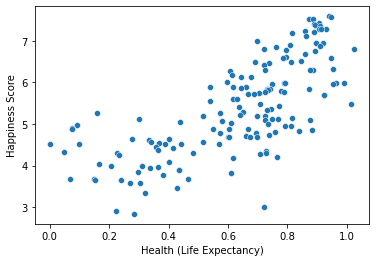

In [25]:
sns.scatterplot("Health (Life Expectancy)","Happiness Score",data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

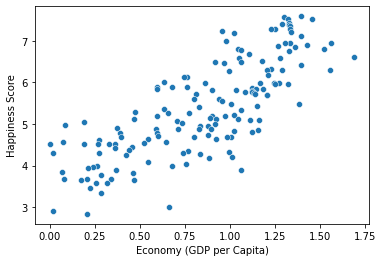

In [26]:
sns.scatterplot("Economy (GDP per Capita)","Happiness Score",data=df)

In [27]:
df_new = pd.DataFrame(df)# Creating a copy of a dataset.

## Data Cleaning

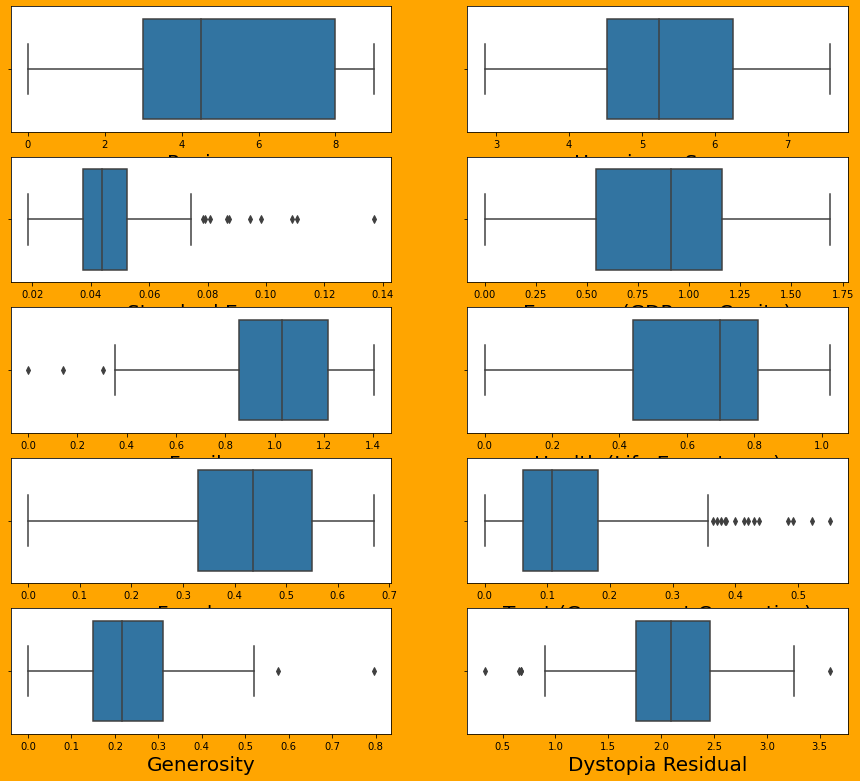

In [28]:
plt.figure(figsize=(15,30),facecolor='orange')
plotnumber = 1
for column in df:
    if plotnumber <= 22:
        ax = plt.subplot(11,2,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [29]:
# Importing Zscore to take care of Outliers
from scipy.stats import zscore

In [30]:
z_score=zscore(df[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual','Health (Life Expectancy)']])
abs_score=np.abs(z_score)

In [31]:
filter=(abs_score<3).all (axis=1)

In [32]:
df=df[filter]

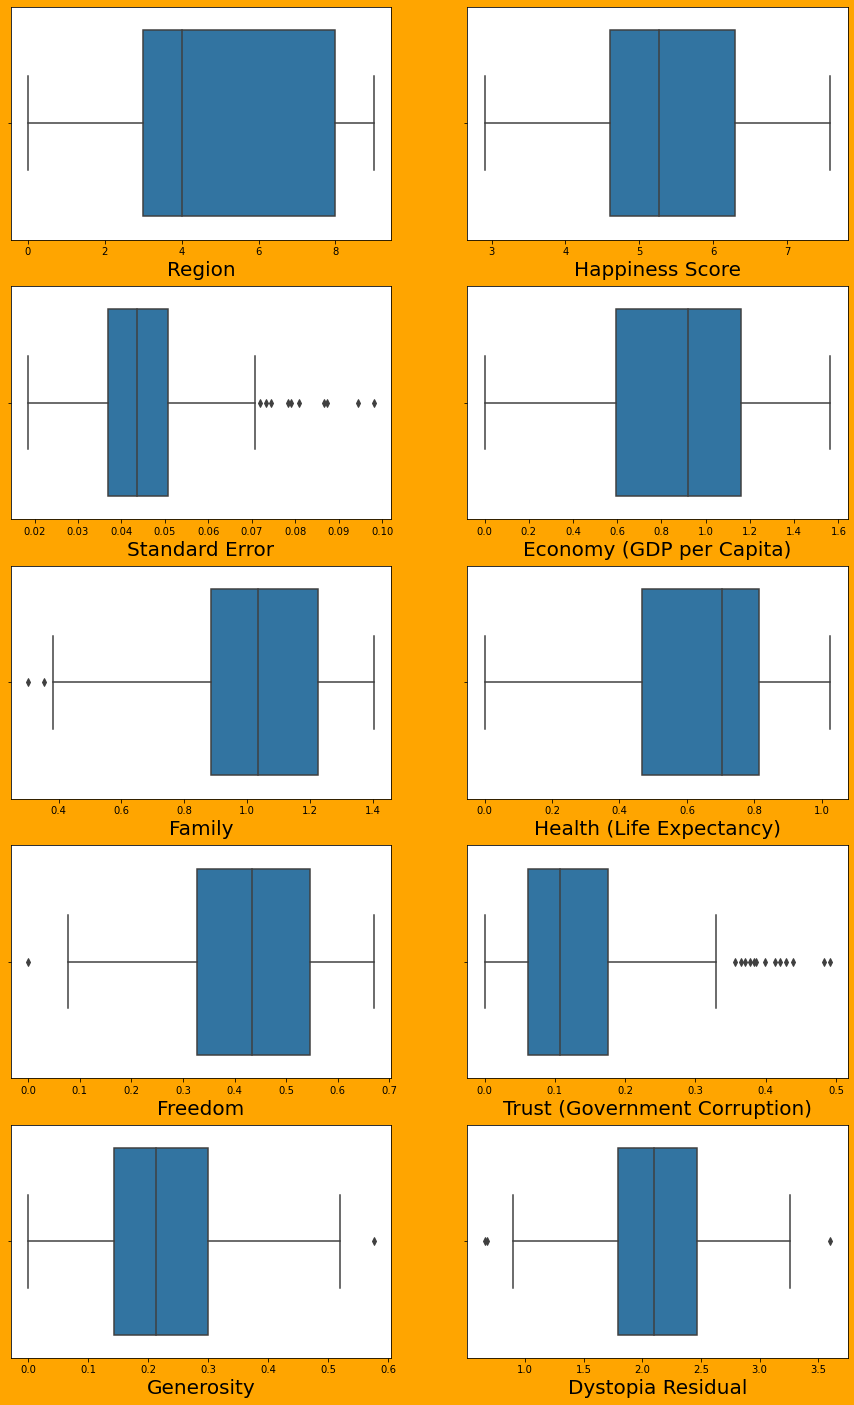

In [33]:
plt.figure(figsize=(15,30),facecolor='orange')
plotnumber = 1
for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [34]:
data = pd.DataFrame(df)# saving into different variable for safer side of further use if needed

In [35]:
df.shape

(149, 10)

## It Still has Some Outliers in The dataset Lets try Interquartile method to remove Outliers on the dataset copy which we make before cleaning

#### Interquantile method

In [36]:
q1=df_new.quantile(0.25)
q3=df_new.quantile(0.75)
iqr=q3-q1

In [37]:
index = np.where(df_new['Dystopia Residual']>(q3['Dystopia Residual']+(1.5*iqr['Dystopia Residual'])))
df_new.drop(df.index[index],inplace =True)

In [38]:
index = np.where(df_new['Standard Error']>(q3['Standard Error']+(1.5*iqr['Standard Error'])))
df_new.drop(df_new.index[index],inplace =True)
df_new.reset_index()

,index,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
142,152,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
143,153,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
144,154,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
145,155,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [39]:
index = np.where(df_new['Trust (Government Corruption)']>(q3['Trust (Government Corruption)']+(1.5*iqr['Trust (Government Corruption)'])))
df_new.drop(df_new.index[index],inplace =True)
df_new.reset_index()

,index,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,9,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,4,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
128,151,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
129,152,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
130,154,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
131,155,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


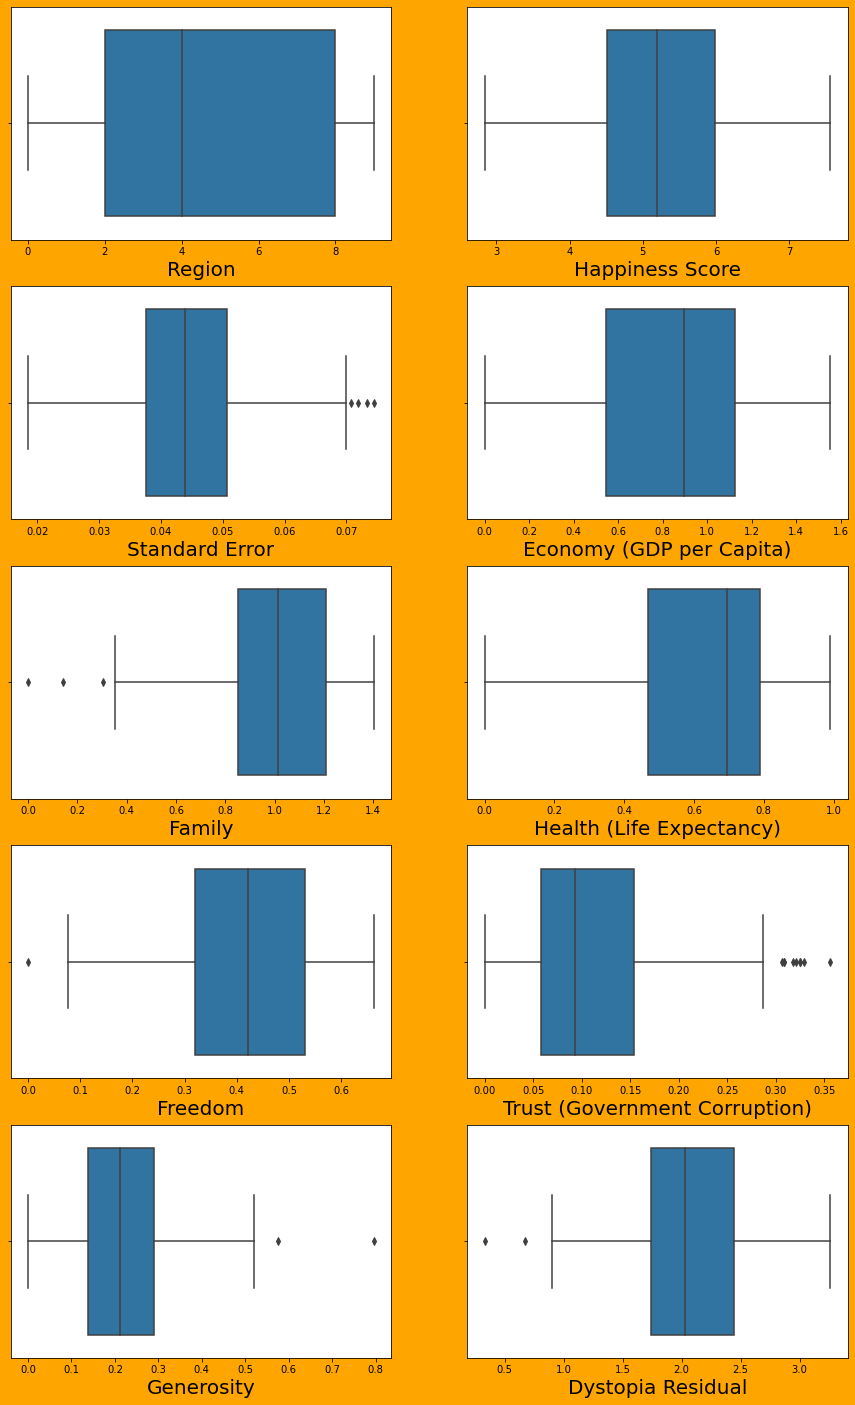

In [40]:
plt.figure(figsize=(15,30),facecolor='orange')
plotnumber = 1
for column in df_new:
    if plotnumber <= 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
df_new.shape

(133, 10)

### After using InterQuantile method i have lost more than 10% of the data. so i am going to use the DataFrame "data" which i have saved after zscore method

In [42]:
# Checking Skewness
data.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

__*There is skewness beyond tolerable limit*__

In [43]:
# Let's use the PowerTransform method
from sklearn.preprocessing import PowerTransformer
pt =PowerTransformer(method='yeo-johnson')

In [44]:
Features =['Dystopia Residual','Generosity','Trust (Government Corruption)','Freedom','Family','Standard Error','Health (Life Expectancy)']
data[Features]=pt.fit_transform(data[Features].values)

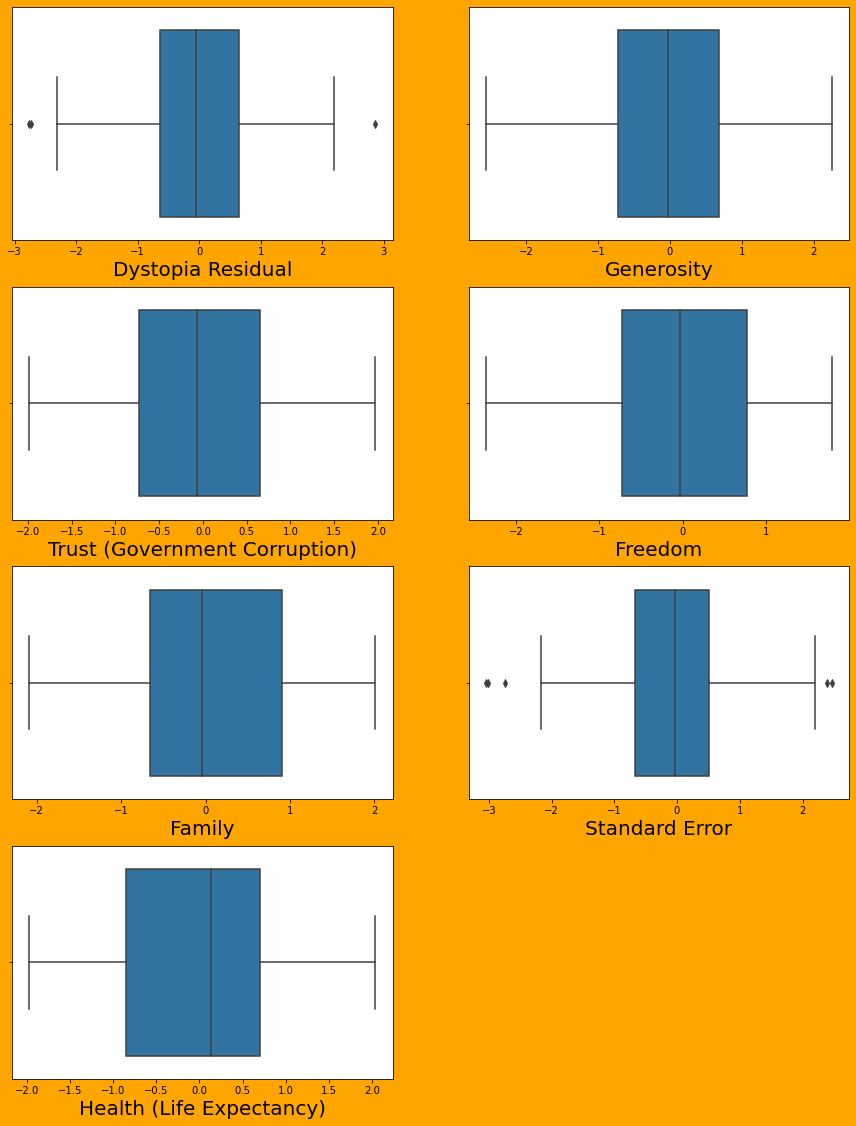

In [45]:
plt.figure(figsize=(15,30),facecolor='orange')
plotnumber = 1
for column in data[Features]:
    if plotnumber <= 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [46]:
data.shape

(149, 10)

In [47]:
data.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.390657
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
x = data.drop(columns="Happiness Score")
y = data['Happiness Score']

In [50]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

### Checking Multicolinearity using VIF

In [51]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
VIF = pd.DataFrame(vif)
VIF["Columns"]=x.columns
VIF

,0,Columns
0,1.330253,Region
1,1.157896,Standard Error
2,4.578724,Economy (GDP per Capita)
3,2.115766,Family
4,4.152343,Health (Life Expectancy)
5,2.130427,Freedom
6,1.453749,Trust (Government Corruption)
7,1.520160,Generosity
8,1.049892,Dystopia Residual


In [52]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[-3.69383510e+00, -1.30440687e+00, -4.86130070e-01, ...,
        -3.93591746e-03,  5.71481402e-02, -2.03877536e-01],
       [-3.09343638e+00, -1.09210881e+00, -9.39997493e-01, ...,
        -3.07021679e-01,  7.70660565e-02, -3.10866527e-01],
       [-3.50457037e+00, -1.64454602e+00, -4.78074572e-01, ...,
         1.25423610e-01, -3.05437989e-01, -4.51825727e-02],
       ...,
       [ 2.34193034e+00, -1.61007915e+00,  1.09070662e+00, ...,
        -7.90320817e-01, -3.86894257e-01,  3.84084689e-01],
       [ 2.20222867e+00, -1.41124166e+00,  1.15952813e+00, ...,
         3.90750412e-01,  1.18528813e+00,  8.36760987e-02],
       [ 4.04847809e+00, -1.06951562e+00, -3.81200225e-01, ...,
        -8.04252510e-01, -2.94661101e-01, -5.67377785e-01]])

In [53]:
np.cumsum(pca.explained_variance_ratio_)# Finding out how many Features are important for model Building

array([0.34662328, 0.5381033 , 0.65610647, 0.75371693, 0.83319923,
       0.90043268, 0.95102165, 0.98630342, 1.        ])

In [54]:
pca = PCA(n_components=8)
new_comp = pca.fit_transform(x_scaled)

In [55]:
princi_comp = pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.693835,-1.304407,-0.486130,0.396255,0.701705,0.720443,-0.003936,0.057148
1,-3.093436,-1.092109,-0.939997,-0.277049,-1.185933,1.407403,-0.307022,0.077066
2,-3.504570,-1.644546,-0.478075,0.432889,0.596185,0.565599,0.125424,-0.305438
3,-3.473765,-1.477229,-0.566801,-0.052083,0.385500,0.754010,-0.108388,0.068607
4,-3.438174,-1.003449,-0.439148,0.097707,-0.327424,-0.460596,-0.220209,-0.463355
...,...,...,...,...,...,...,...,...
144,1.754368,-1.688538,0.586006,-0.952174,0.981130,-0.190073,0.552505,0.186101
145,1.931384,-1.538925,0.924750,-0.215275,0.511556,-0.121862,0.624033,-0.174911
146,2.341930,-1.610079,1.090707,1.488761,-0.151360,-0.951575,-0.790321,-0.386894
147,2.202229,-1.411242,1.159528,0.583430,0.552202,-0.495916,0.390750,1.185288


In [67]:
# importing models and evaluation metrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

In [57]:
max_accu = 0
max_RS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    if r2score > max_accu:
        max_Rs = i
        max_accu = r2score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.9975928294735045


__From above code we come to know that best random_state is 0__

In [58]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=0)

### Linear Regression model

In [60]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(x_test)

In [62]:
r2score =[]
result = (r2_score(y_test,y_pred))

In [91]:
cv =cross_val_score(lr,princi_comp,y,cv=3).mean()
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(lr,x_scaled,y,cv=5).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9698188137686541 
 Cross Validation Score : 0.8966071710543047 
 Mean squared error: 0.035925652724561545


In [71]:
params = {"normalize":["True","False"],
         "n_jobs":list(range(0,50))}
ran_search = RandomizedSearchCV(lr,params,random_state=1)
ran_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LinearRegression(),
                   param_distributions={'n_jobs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...],
                                        'normalize': ['True', 'False']},
                   random_state=1)

In [72]:
ran_search.best_params_

{'normalize': 'True', 'n_jobs': 40}

In [73]:
lr = LinearRegression(normalize=True,n_jobs=40)
lr.fit(x_train,y_train)

LinearRegression(n_jobs=40, normalize=True)

In [74]:
y_pred = lr.predict(x_test)

In [90]:
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(lr,x_scaled,y,cv=5).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9698188137686541 
 Cross Validation Score : 0.8966071710543047 
 Mean squared error: 0.035925652724561545


## SVR

In [93]:
sr = SVR()
sr.fit(x_train,y_train)

SVR()

In [94]:
y_pred = sr.predict(x_test)

In [95]:
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(sr,x_scaled,y,cv=3).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9698188137686541 
 Cross Validation Score : -2.910149092867371 
 Mean squared error: 0.035925652724561545


In [113]:
param_grid={'C':[1,20,25,30,40,32,100,210,300,500,1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVR(),param_grid)
grid.fit(x_train,y_train)

In [114]:
grid.best_params_

{'C': 20, 'degree': 1, 'kernel': 'poly'}

In [121]:
sr = SVR(C=20,degree=1,kernel='poly')
sr.fit(x_train,y_train)

SVR(C=20, degree=1, kernel='poly')

In [124]:
y_pred = sr.predict(x_test)

In [163]:
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(sr,x_scaled,y,cv=5).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9406381156411098 
 Cross Validation Score : 0.878728610961846 
 Mean squared error: 0.07066039174888869


### After tunning the SVR model start giving a good r2score and **cross_val_score**

## Random Forest

In [143]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
y_pred = rf.predict(x_test)

In [134]:
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(rf,x_scaled,y,cv=3).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.94307470772485 
 Cross Validation Score : -2.7621691863045323 
 Mean squared error: 0.06776003652888894


In [150]:
param_grid = {"n_estimators":[100,120,150,150,200],"criterion":["mse","mae"],"max_depth":range(1,100,4),"min_samples_split":range(2,50,2)}

In [151]:
rf.get_params().keys()# Checking the available parameters

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [153]:
grid=GridSearchCV(rf,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(1, 100, 4),
                         'min_samples_split': range(2, 50, 2),
                         'n_estimators': [100, 120, 150, 150, 200]})

In [154]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 61,
 'min_samples_split': 2,
 'n_estimators': 100}

In [156]:
rf = RandomForestRegressor(criterion = 'mse',max_depth=61,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=61)

In [157]:
y_pred = rf.predict(x_test)

In [162]:
cross_val_score(rf,princi_comp,y,cv=3).mean()

-3.511523283383118

## Decision Tree

In [99]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(dt,x_scaled,y,cv=3).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9421148407986577 
 Cross Validation Score : -3.988679105836688 
 Mean squared error: 0.06890259751333307


In [100]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("For Linear Regression:\n","R2_Score :",r2_score(y_test,y_pred),"\n",
      "Cross Validation Score :",cross_val_score(gb,x_scaled,y,cv=3).mean(),"\n Mean squared error:",
      mean_squared_error(y_test,y_pred))

For Linear Regression:
 R2_Score : 0.9421148407986577 
 Cross Validation Score : -1.6526663729738 
 Mean squared error: 0.06890259751333307


#### Checked the model without tunning and After tunning as well and try to remove the negative cross validation score through tunning